In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' ) 

In [6]:
import pandas 
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import pickle
from scipy.stats import pearsonr

# Feature sets 

This notebook collects the various feature sets from molecular modeling (in `*runs/*/feature_set.csv'`), and matches them up with the various targets (for now, melting temperature, turnover number, substrate affinity, and efficiency) for input to machine learning algorithms

In [15]:
paths = [ 
    # rosetta 
    '../rosetta_runs/benchmark/feature_set.csv', 
    '../rosetta_runs/shells/feature_set.csv',
    '../rosetta_runs/ddg_monomer/feature_set.csv', 
    '../rosetta_runs/new_protocol/feature_set.csv', 
    
    # pyrosetta 
    '../pyrosetta_runs/beta/feature_set.csv', 
    
    # foldx 
    '../foldx_runs/pssm/feature_set.csv', 
    
    # dreaming 
    # '../rosetta_runs/homology_models/feature_set.csv', 
]

In [16]:
dat = pandas.read_csv( '../data_sets/experimental/targets.csv', index_col=0 )
#dat.kcat = np.log10( dat.kcat / 880 )
#dat.km = np.log10( dat.km / 5.5 )
#dat.kcatkm = np.log10( dat.kcatkm / 174000 )
#dat = dat.replace( [ np.inf, -np.inf ], -5 )

In [17]:
targets = [ 'kcat', 'km', 'kcatkm', 'tm' ] 

In [18]:
combos = []
for feature_set in paths:
    feats = pandas.read_csv( feature_set, index_col=0 )
    nm = feature_set.split( '/' )[2]
    for target in targets:
        J = dat[[ target ]].join( feats ).dropna()
        scaler = MinMaxScaler()
        X = scaler.fit_transform( J )
        y = J.ix[ : , 0 ].ravel()
        X = X[ : , 1: ] 
        combos.append( ( nm, target, X, y, J.columns[ 1: ] ) )

In [19]:
with open( 'combos.pkl', 'wb' ) as fn:
    pickle.dump( combos, fn ) 

## Feature distributions

Here, we attempt to make a compact representation of the feature ranges in the feature set. Each plot is titled with the feature set name and target name (each feature set has different mutants in it, depending on the target). Each feature has been normalized to the [0,1] interval. The number in parentheses after the feature name is the Pearson correlation coefficient for the individual feature to the target.

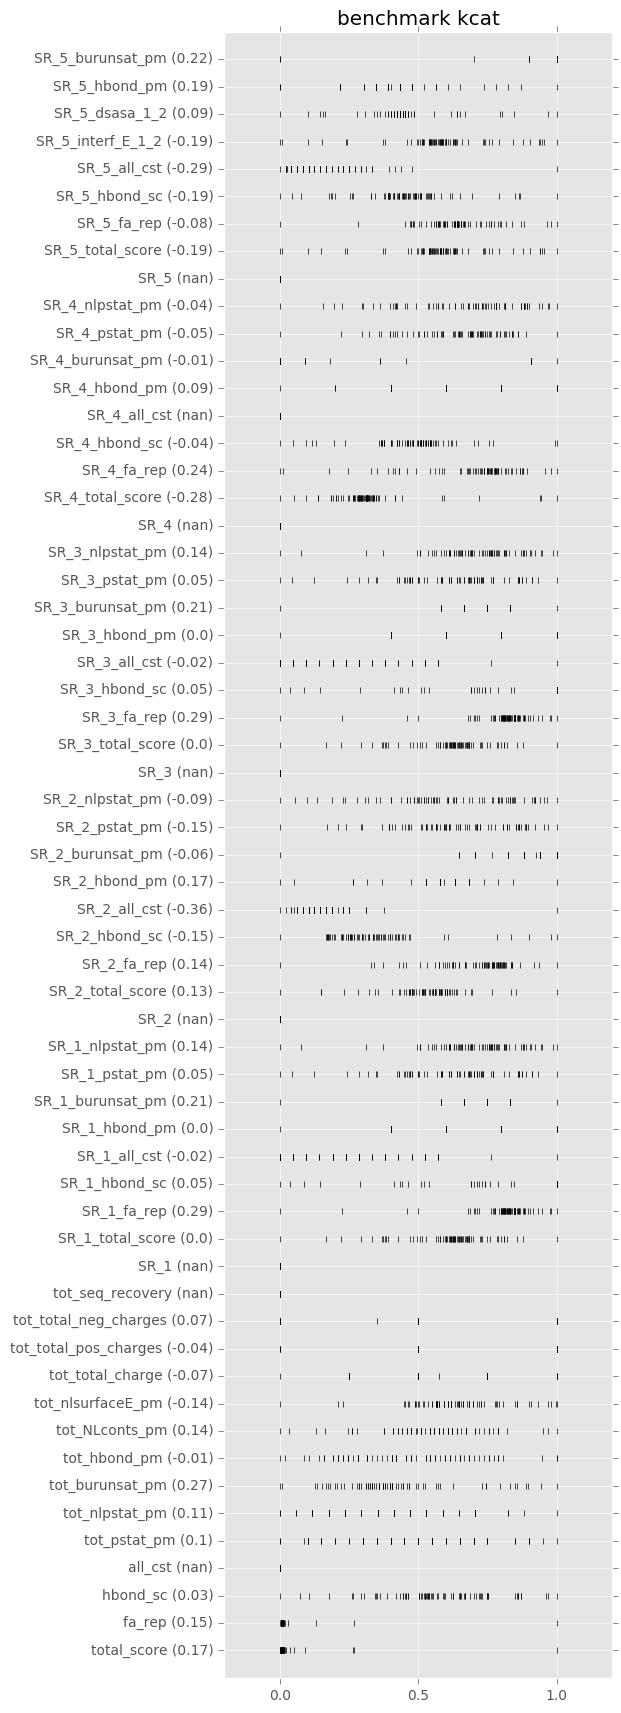

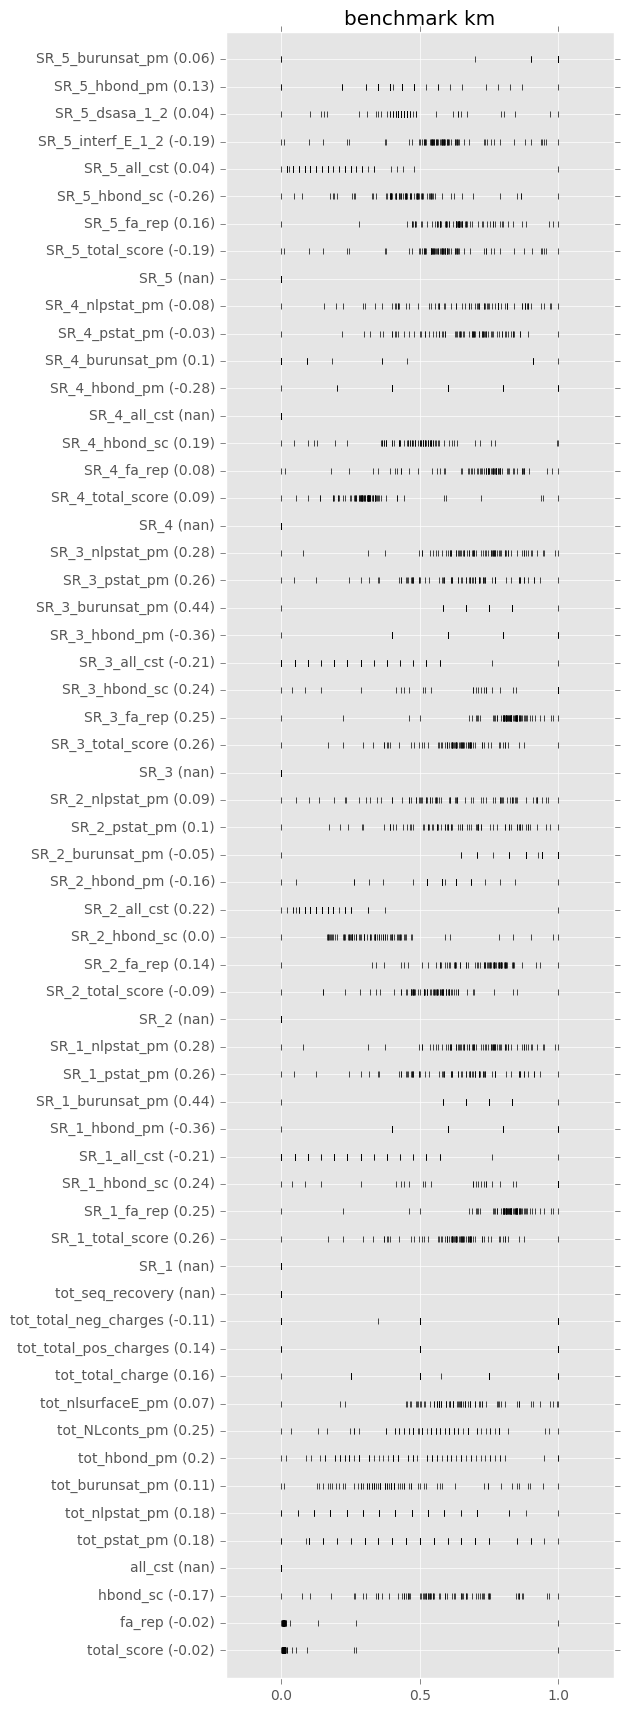

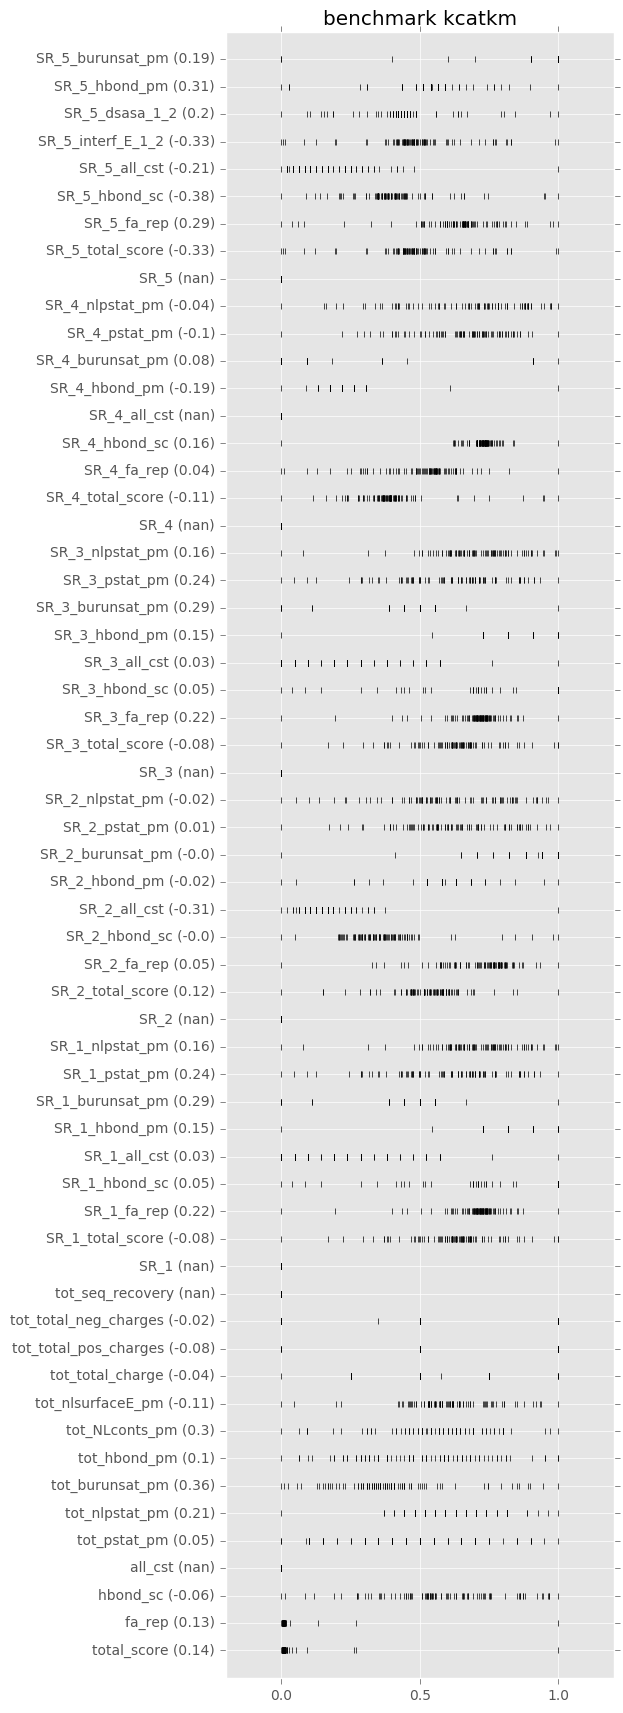

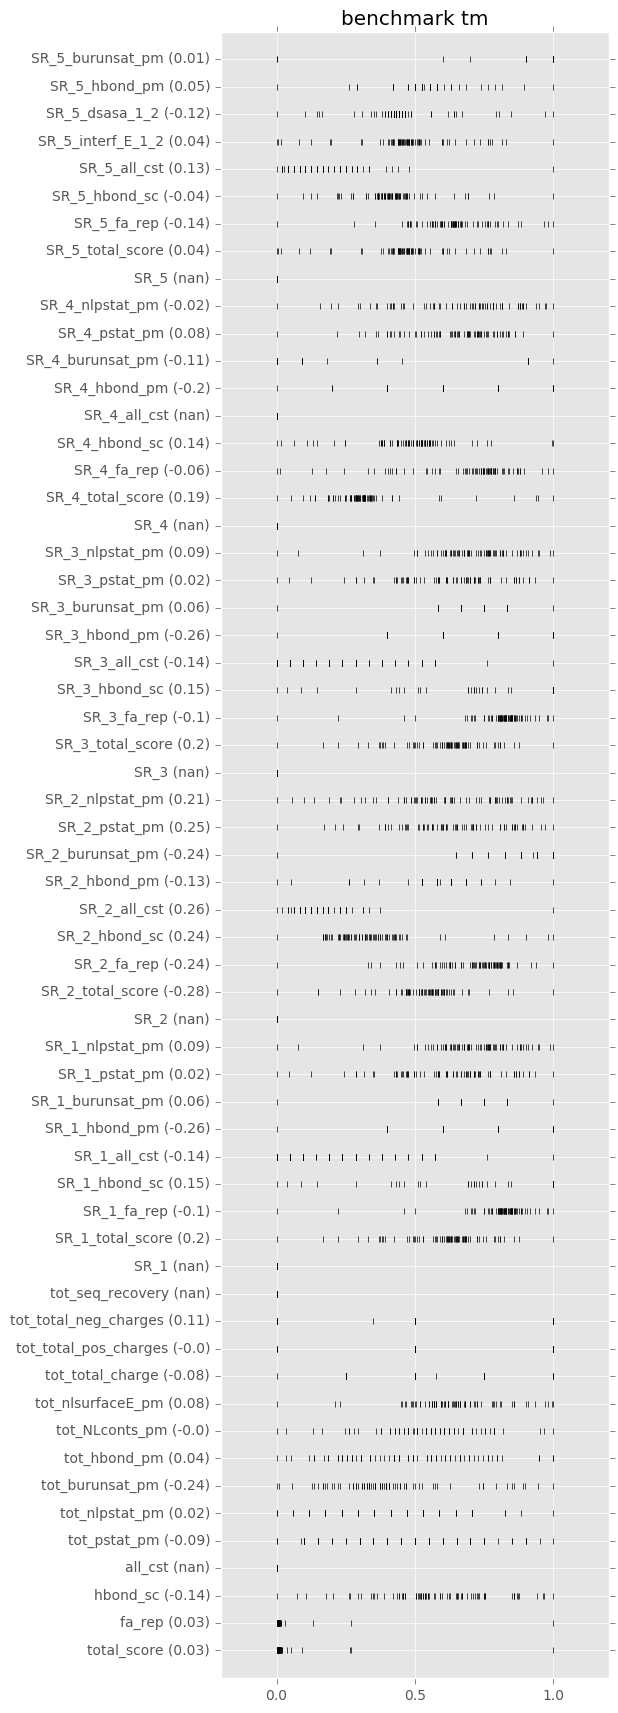

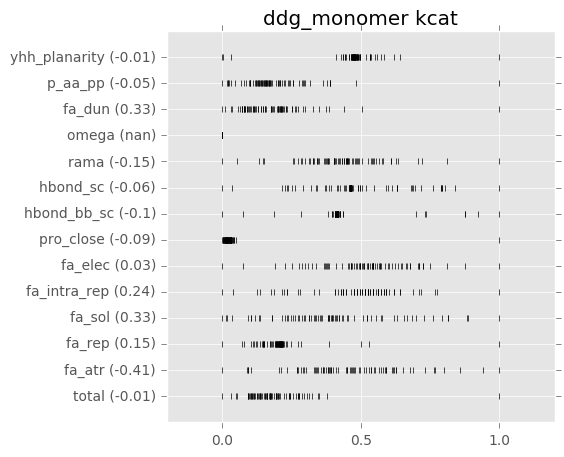

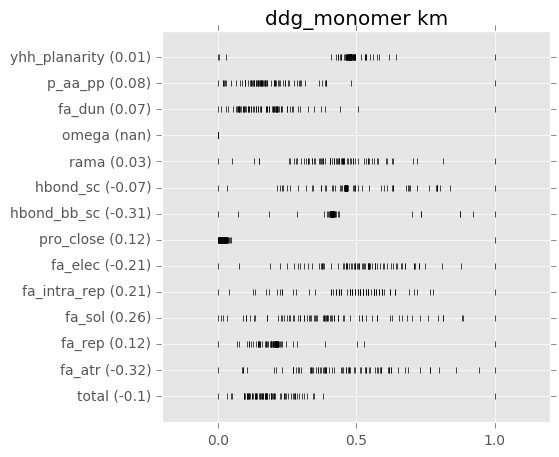

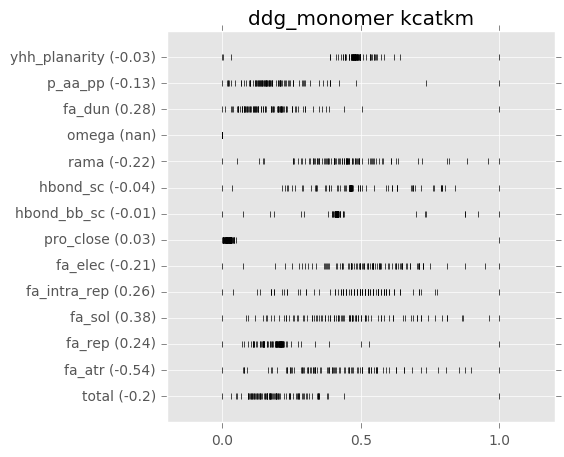

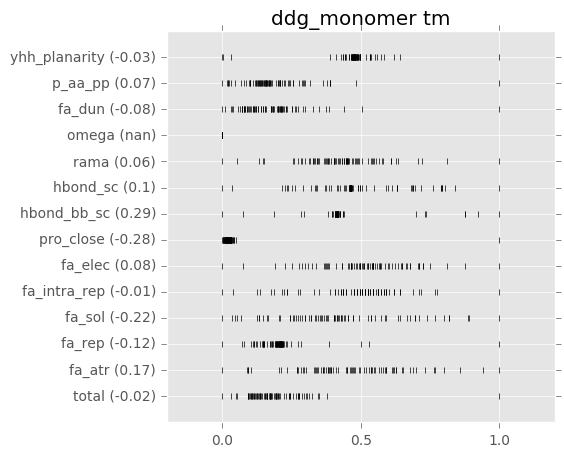

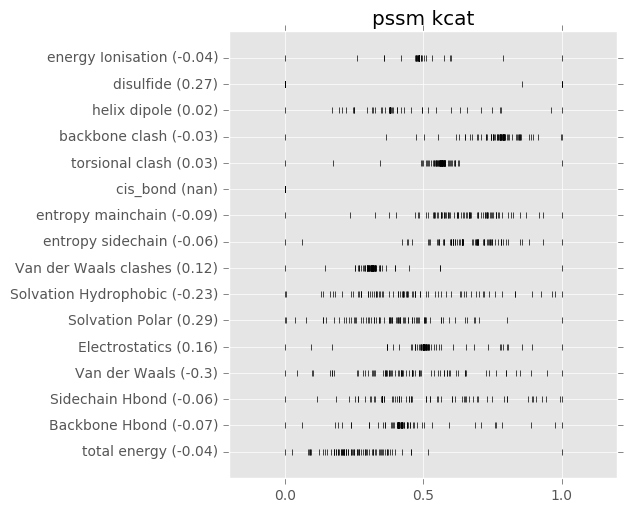

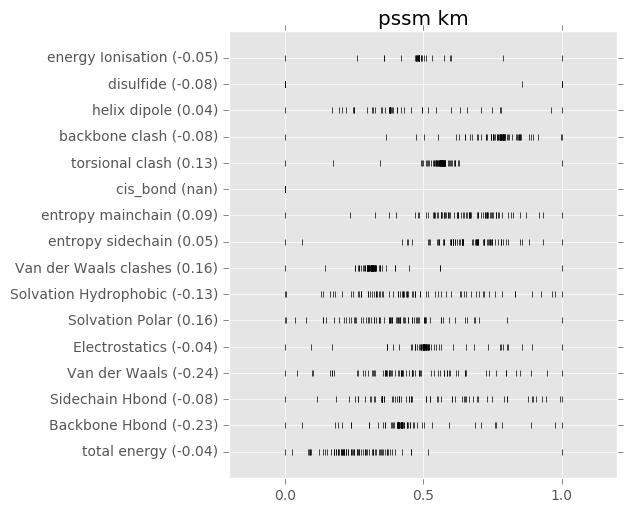

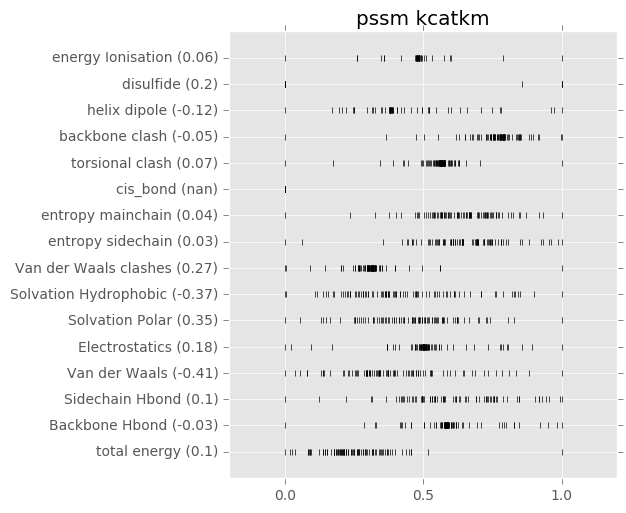

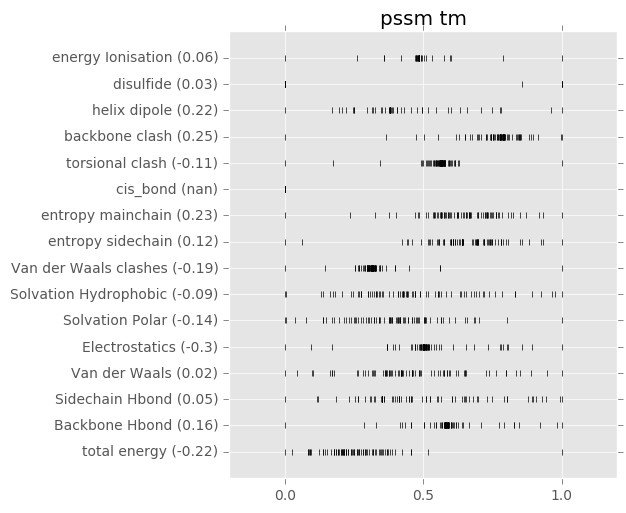

In [42]:
for nm, target, X, y, support in combos: 
    plt.figure( figsize=( 5, 0.36 * len( support ) ) )
    support_vals = []
    for i, col_name in enumerate( support ):
        plt.scatter( X[ : , i ], [ i ] * len( X ), marker='|', color='k' )
        plt.title( '{} {}'.format( nm, target ) )
        plt.ylim( -1, len( support ) )
        r, p = pearsonr( X[ : , i ], y )
        support_vals.append( '{} ({})'.format( col_name, r.round(2) ) )
        
    plt.yticks( range( len( support_vals ) ), support_vals )
    plt.xticks( ( 0, .5, 1 ) )